# <center>Holiday package prediction</center>

### Problem statemet :

Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering * Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

## Holiday Package Purchase Prediction Dataset

This dataset helps in predicting whether a customer is likely to purchase a holiday package based on various features.

**Columns and Their Descriptions:**

- **CustomerID**: Unique identifier for each customer.
- **ProdTaken**: Indicates if the customer purchased the holiday package (0: No, 1: Yes).
- **Age**: Age of the customer.
- **TypeofContact**: How the customer was contacted (Company Invited or Self Inquiry).
- **CityTier**: Tier of the city based on development, population, facilities, and living standards.
- **DurationOfPitch**: Duration of the sales pitch to the customer.
- **Occupation**: Occupation of the customer.
- **Gender**: Gender of the customer.
- **NumberOfPersonVisiting**: Number of people planning to take the trip with the customer.
- **NumberOfFollowups**: Number of follow-ups done by the salesperson after the pitch.
- **ProductPitched**: Product pitched by the salesperson.
- **PreferredPropertyStar**: Preferred hotel property rating by the customer.
- **MaritalStatus**: Marital status of the customer.
- **NumberOfTrips**: Average number of trips taken by the customer in a year.
- **Passport**: Indicates if the customer has a passport (0: No, 1: Yes).
- **PitchSatisfactionScore**: Satisfaction score of the sales pitch.
- **OwnCar**: Indicates if the customer owns a car (0: No, 1: Yes).
- **NumberOfChildrenVisiting**: Number of children under 5 years old planning to take the trip with the customer.

This dataset helps in predicting whether a customer is likely to purchase a holiday package based on these features.


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from sklearn.model_selection import train_test_split
import seaborn as sns

In [62]:
df = pd.read_csv('../Travel.csv')
df.head(3)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0


In [63]:
print('Number of rows : ' ,len(df))
print('Number of columns :' , len(df.columns))

Number of rows :  4888
Number of columns : 20


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [65]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


## <center>Data Cleaning</center>

**Handling missing values**

In [66]:
def missing_values(df):
    
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (total /len(df)) * 100
    return pd.concat((total , percent) , axis = 1 , keys = ['Total' , 'Percent'])

miss_values = missing_values(df)
miss_values[miss_values!=0]

,Total,Percent
DurationOfPitch,251.0,5.135025
MonthlyIncome,233.0,4.766776
Age,226.0,4.623568
NumberOfTrips,140.0,2.864157
NumberOfChildrenVisiting,66.0,1.350245
NumberOfFollowups,45.0,0.920622
PreferredPropertyStar,26.0,0.531915
TypeofContact,25.0,0.511457
CustomerID,NaN,NaN
ProdTaken,NaN,NaN


**Imputing the missing values**

In [67]:
from sklearn.impute import SimpleImputer

imputer_1 = SimpleImputer(strategy= 'median')
imputer_2 = SimpleImputer(strategy= 'most_frequent')

df[['Age','DurationOfPitch', 'MonthlyIncome' , 'NumberOfTrips']] = imputer_1.fit_transform(df[['Age','DurationOfPitch', 'MonthlyIncome' , 'NumberOfTrips']])
df[['TypeofContact' , 'NumberOfFollowups' , 'PreferredPropertyStar' , 'NumberOfChildrenVisiting']] = imputer_2.fit_transform(df[['TypeofContact' , 'NumberOfFollowups' , 'PreferredPropertyStar' , 'NumberOfChildrenVisiting']])

In [68]:
df.drop('CustomerID' , axis= 1 , inplace= True)

**Distribution of the features**

In [69]:
numerical_columns = df.select_dtypes(include='number').columns
categorical_colums = df.select_dtypes(include='object').columns

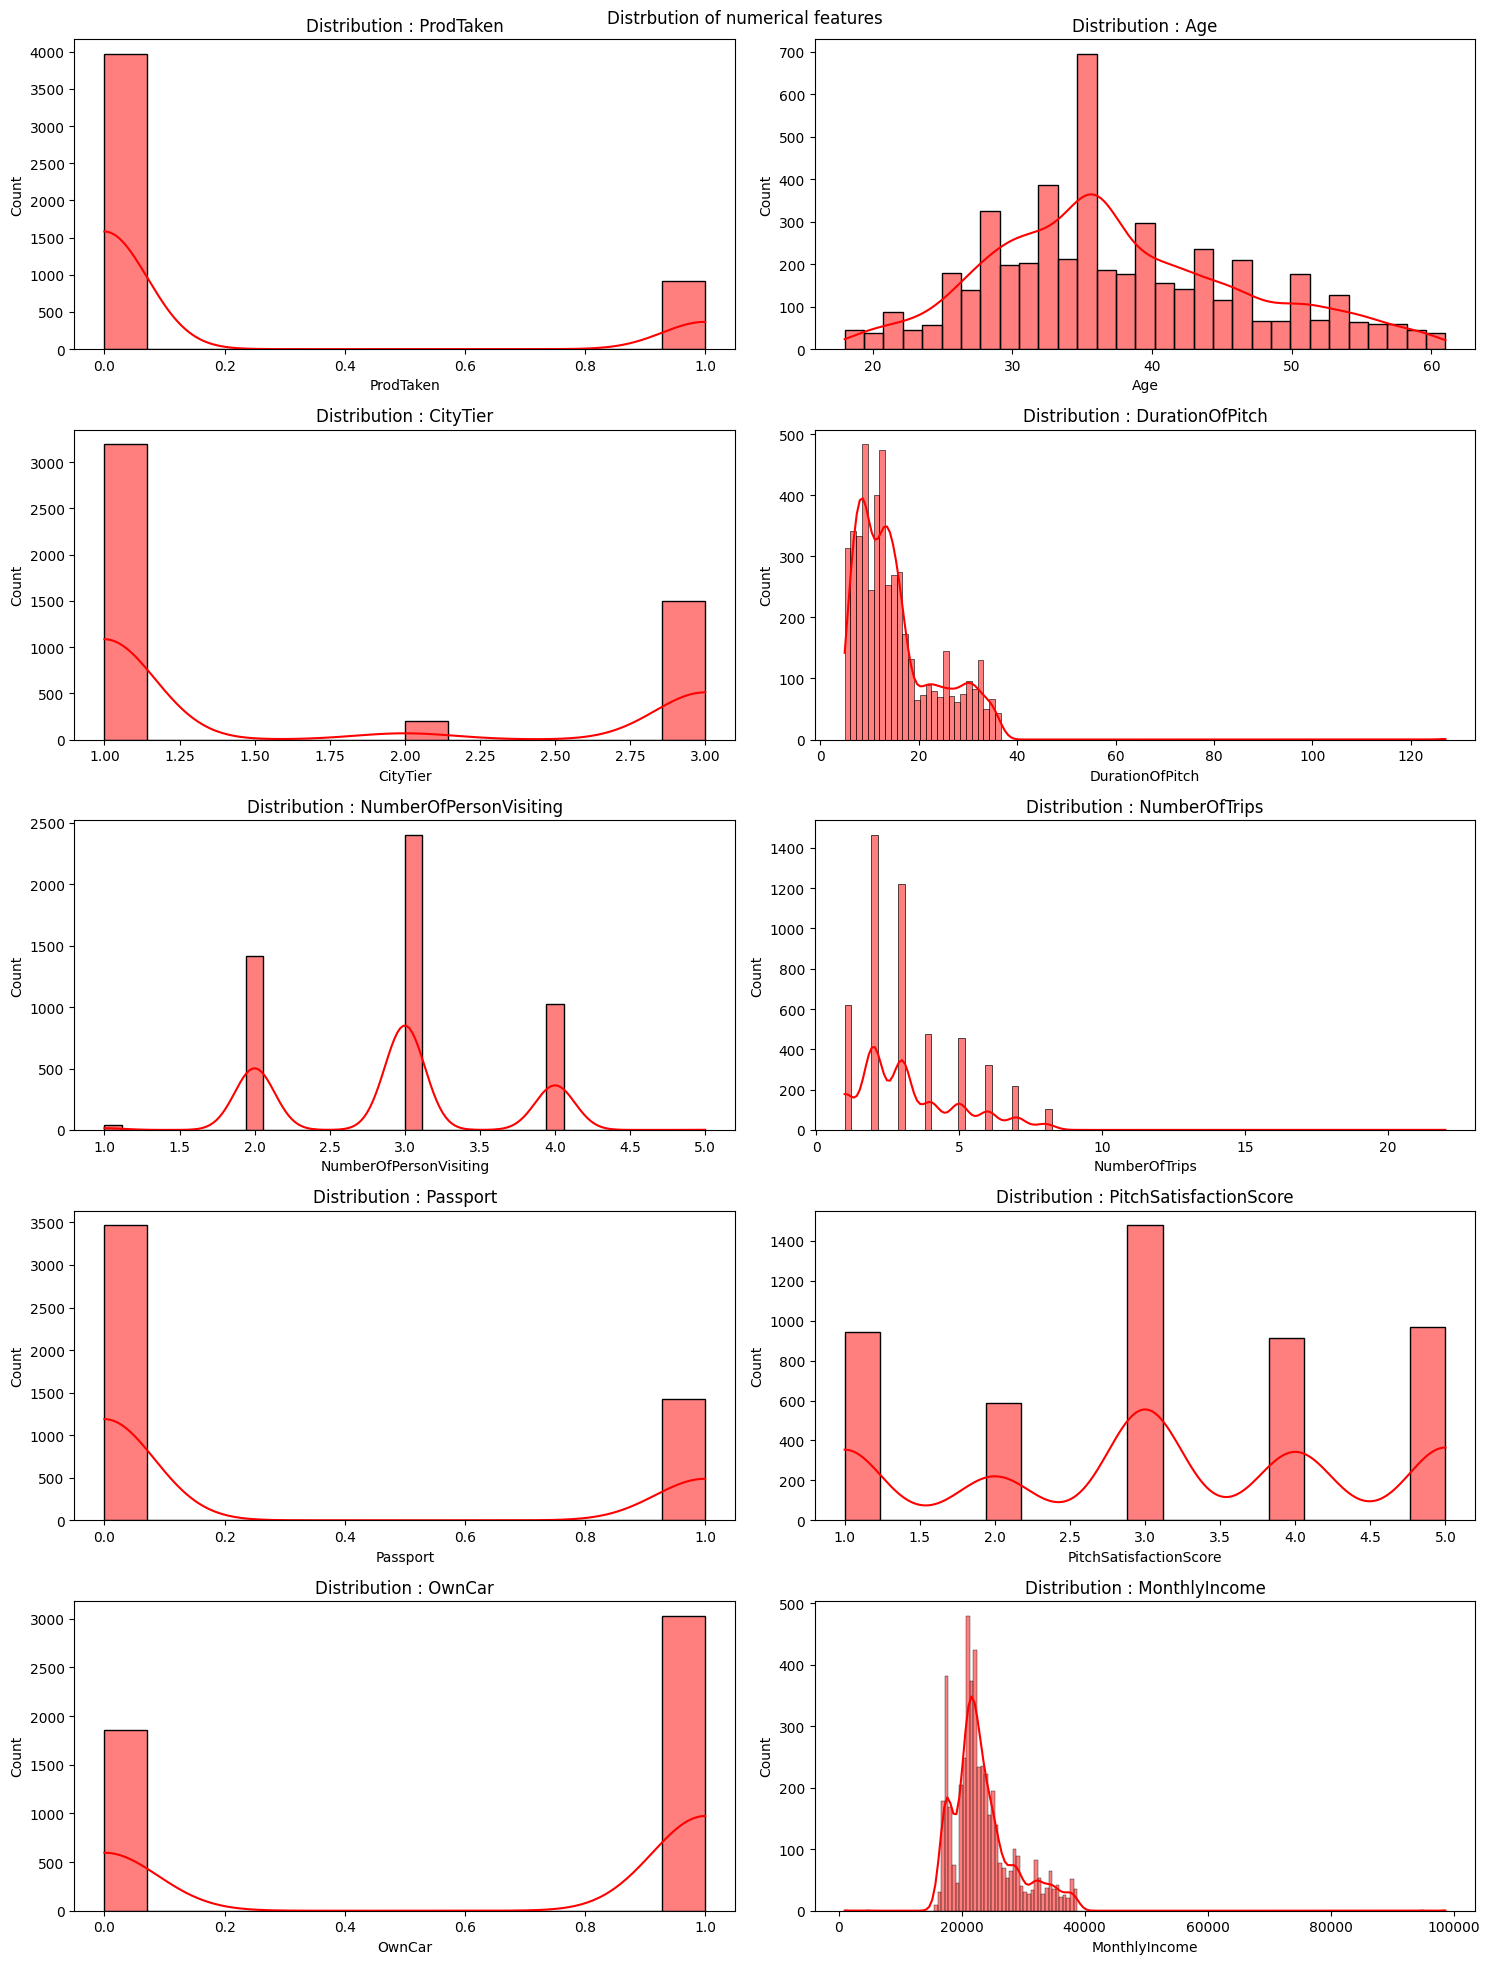

In [70]:
fig , axes = plt.subplots(nrows=5 , ncols=2 , figsize = (15,20))
plt.suptitle('Distrbution of numerical features')
for i in range(len(numerical_columns)):
    plt.subplot(5,2,i+1)
    sns.histplot(df[numerical_columns[i]] , color = 'r' , kde = True)
    title = 'Distribution : '+  numerical_columns[i]
    plt.title(title)
    plt.tight_layout()
plt.show()

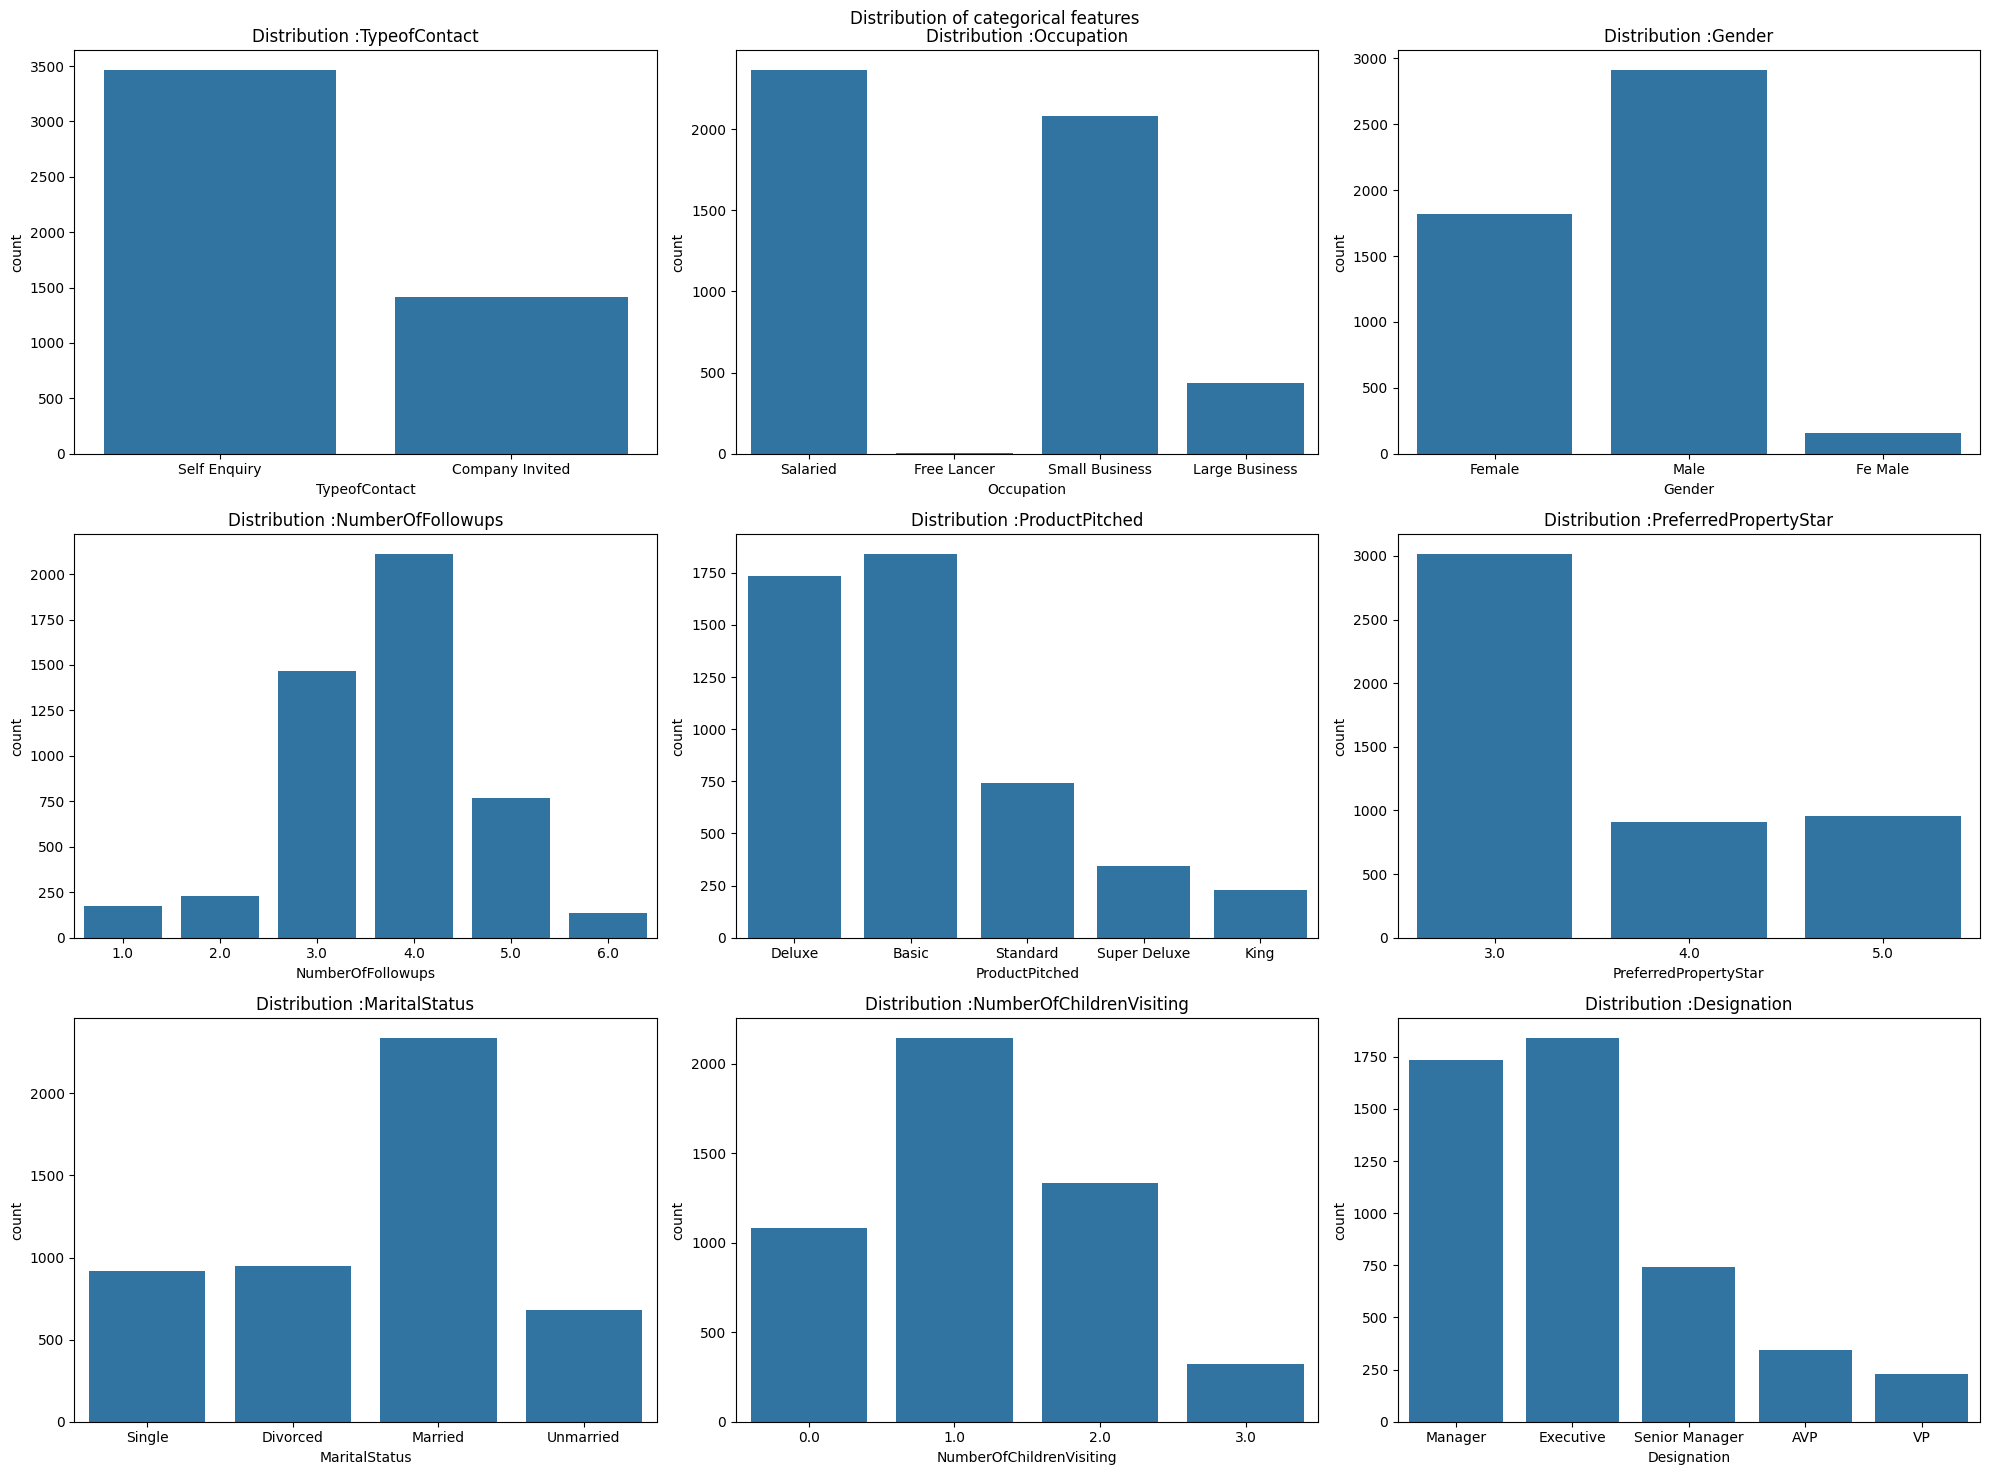

In [71]:
fig , axes = plt.subplots(nrows= 3 , ncols= 3 , figsize = (20,15))
plt.suptitle('Distribution of categorical features')
for i in range(len(categorical_colums)):
    plt.subplot(3,3,i+1)
    sns.countplot(x = df[categorical_colums[i]] , data = df)
    title = 'Distribution :' + categorical_colums[i]
    plt.title(title)
    plt.tight_layout()
plt.show()


In [72]:
#We can see there is a Fe male in gender section . maybe due to typing error

df['Gender'] = df['Gender'].replace('Fe Male' , 'Female')
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [73]:
#Also in marital status single and unmarried are same thing
df['MaritalStatus'] = df['MaritalStatus'].replace('Unmarried' , 'Single')
df['MaritalStatus'].value_counts()

MaritalStatus
Married     2340
Single      1598
Divorced     950
Name: count, dtype: int64

## <center>Feature Engineering</center>

In [74]:
#create a new column for feature

df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns = ['NumberOfPersonVisiting' , 'NumberOfChildrenVisiting'] , axis = 1 , inplace= True)
df.head(1)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0


**Seperating the features**

In [75]:
#Numerical features 
numerical_features = [feature for feature in df.columns if df[feature].dtype !='O']
len(numerical_features)

9

In [76]:
#categorical features
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']
len(categorical_features)

9

In [77]:
#Discrete features
discrete_features = [feature for feature in numerical_features if len(df[feature].unique()) <= 25]
len(discrete_features)

6

In [78]:
#continous features 
continous_features = [feature for feature in numerical_features if feature not in discrete_features]
len(continous_features)

3

## <center>Train Test Split</center>

In [79]:
x = df.drop('ProdTaken' , axis = 1)
y = df['ProdTaken']

In [80]:
x.head(3)

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0


In [81]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [82]:
#splitting the data to train test 
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size= 0.20 , random_state= 42)
x_train.shape , x_test.shape

((3910, 17), (978, 17))

In [83]:
#create a column transformer
cat_features = x.select_dtypes(include='object').columns
num_features = x.select_dtypes(exclude='object').columns

from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
encoding_transformer = OneHotEncoder(drop = 'first')

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder' , encoding_transformer , cat_features),
        ('StandardScaler' , numeric_transformer , num_features)
    ]
)

preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'Designation', 'TotalVisiting'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome'],
      dtype='object'))])

In [84]:
#Applying transformation in train dataset 
x_train = preprocessor.fit_transform(x_train)
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,-0.157926,-0.721400,-1.020350,-0.127737,-0.632399,0.679690,0.782966,-0.382245
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.508072,-0.721400,0.690023,1.511598,-0.632399,0.679690,0.782966,-0.459799
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.396069,-0.721400,-1.020350,0.418708,-0.632399,0.679690,0.782966,-0.245196
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.064073,-0.721400,-1.020350,-0.127737,-0.632399,1.408395,-1.277194,0.213475
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.730071,-0.721400,2.400396,1.511598,-0.632399,-0.049015,-1.277194,-0.024889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,-1.045924,-0.721400,-0.653841,-0.674182,-0.632399,-1.506426,0.782966,-0.536973
3906,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.397072,1.455047,-0.898180,-1.220627,-0.632399,1.408395,0.782966,1.529609
3907,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.064073,1.455047,1.545210,2.058043,-0.632399,-0.777720,0.782966,-0.360576
3908,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,-1.045924,1.455047,1.789549,-0.127737,-0.632399,-1.506426,0.782966,-0.252799


In [85]:
#Applying transformation x_test dataset
x_test = preprocessor.transform(x_test)
pd.DataFrame(x_test)

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,-0.601925,1.455047,-0.287333,-1.220627,-0.632399,-0.777720,-1.277194,-0.737510
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.952071,0.366823,-0.531672,-1.220627,1.581280,1.408395,-1.277194,-0.670411
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,-0.046926,1.455047,0.812193,0.965153,-0.632399,1.408395,0.782966,-0.420832
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.619072,-0.721400,2.522566,1.511598,-0.632399,-0.049015,0.782966,-0.113658
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,-1.378923,1.455047,-1.020350,-0.127737,1.581280,0.679690,0.782966,-0.317047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.064073,-0.721400,-1.020350,1.511598,-0.632399,1.408395,0.782966,0.498219
974,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,-0.934924,-0.721400,-1.142519,-0.674182,1.581280,-1.506426,-1.277194,-1.184015
975,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,-0.268926,-0.721400,1.056532,-0.674182,1.581280,1.408395,0.782966,0.690012
976,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.267923,-0.721400,-0.287333,-0.674182,-0.632399,1.408395,0.782966,-0.228278


### ADABoosting

In [86]:
models = {
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier() , 
    'Gradient Boost':GradientBoostingClassifier(), 
    'Adaboost':AdaBoostClassifier(algorithm='SAMME')
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train , y_train)
    
    #Make Predictions 
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
                                
    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc
    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')
    

Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9029
- F1 score: 0.9026
- Precision: 0.7553
- Recall: 0.7435
- Roc Auc Score: 0.8425


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9151
- F1 score: 0.9070
- Precision: 0.9576
- Recall: 0.5916
- Roc Auc Score: 0.7926


Gradient Boost
Model performance for Training set
- Accuracy: 0.8949
- F1 score: 0.8830
- Precision: 0.8822
- Recall: 0.5034
- Roc Auc Score: 0.7440
----------------------------------
Model performance for Test set
- Accuracy: 0.8620
- F1 score: 0.8430
- Precision: 0.7917
- Recall: 0.3979
- Roc Auc Score: 0.6862


Adaboost
Model performance for Training set
- Accuracy

### Hyper parameter training

In [87]:
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, 3,  8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

adaboost_params = {
    'n_estimators' : [50 , 60 , 70 , 80 , 90] , 
    'algorithm' : ['SAMME' , 'SAMME.R']
}

print(rf_params)
print('-----'*30)
print(adaboost_params)

{'max_depth': [5, 8, 15, None, 10], 'max_features': [5, 7, 3, 8], 'min_samples_split': [2, 8, 15, 20], 'n_estimators': [100, 200, 500, 1000]}
------------------------------------------------------------------------------------------------------------------------------------------------------
{'n_estimators': [50, 60, 70, 80, 90], 'algorithm': ['SAMME', 'SAMME.R']}


In [88]:
#models list for hyperparameter tuning 
randomcv_models = [
    ('RF' , RandomForestClassifier() , rf_params),
    ('AB' , AdaBoostClassifier() , adaboost_params)
]
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 3, 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]}),
 ('AB',
  AdaBoostClassifier(),
  {'n_estimators': [50, 60, 70, 80, 90], 'algorithm': ['SAMME', 'SAMME.R']})]

In [89]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1,
                                   error_score='raise')
    random.fit(x_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\10714194\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 10 candidates, totalling 30 fits
---------------- Best Params for RF -------------------
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 8, 'max_depth': 15}
---------------- Best Params for AB -------------------
{'n_estimators': 70, 'algorithm': 'SAMME'}


In [91]:
models = {
    'Random Forest': RandomForestClassifier(n_estimators =  500, min_samples_split =  2, max_features =  8, max_depth =  15) , 
    'Adaboost':AdaBoostClassifier(n_estimators =  70, algorithm =  'SAMME')
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train , y_train)
    
    #Make Predictions 
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
                                
    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc
    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')
    

Random Forest
Model performance for Training set
- Accuracy: 0.9987
- F1 score: 0.9987
- Precision: 1.0000
- Recall: 0.9931
- Roc Auc Score: 0.9966
----------------------------------
Model performance for Test set
- Accuracy: 0.9172
- F1 score: 0.9098
- Precision: 0.9508
- Recall: 0.6073
- Roc Auc Score: 0.7999


Adaboost
Model performance for Training set
- Accuracy: 0.8478
- F1 score: 0.8149
- Precision: 0.7792
- Recall: 0.2565
- Roc Auc Score: 0.6199
----------------------------------
Model performance for Test set
- Accuracy: 0.8303
- F1 score: 0.7930
- Precision: 0.7049
- Recall: 0.2251
- Roc Auc Score: 0.6011


